In [1]:
import re

def extract_compare(item):
    regex = r"(.*)\((.*)\)"
    match = re.match(regex, item)
    if not match:
        raise RuntimeError(f"Operation not defined correctly {item}")
    _, parameters = match.groups()
    branches, trunk = parameters.split(";")
    return trunk, branches.split(",")

def operationSorting(arr):
    n = len(arr)
    items = [(extract_compare(e), e) for e in arr]

    i = 0
    while i<n:
        item1 = items[i]
        for j in range(i+1, n):
            item2 = items[j]
            if item1[0][0] in item2[0][1]:
                items.pop(i)
                items.insert(j, item1)
                break
        else:
            i += 1
    return list(map(lambda x: x[1], items))

{'R1': array([ 1.        , -0.98453652]), 'R14': array([-0.28578663, -0.21027692]), 'R5': array([ 0.08744032, -0.57660689]), 'R4': array([ 0.27314788, -0.23761508]), 'R3': array([ 0.60342192, -0.59688355]), 'R6': array([ 0.54855005, -0.08721125]), 'R7': array([0.20849107, 0.30487099]), 'R8': array([ 0.06810187, -0.13055229]), 'R9': array([-0.28711059,  0.2314849 ]), 'R10': array([-0.72102972,  0.15132811]), 'R11': array([-0.50635301,  0.72554711]), 'R13': array([-0.036477  ,  0.81853115]), 'R12': array([-0.95239616,  0.59192024])}


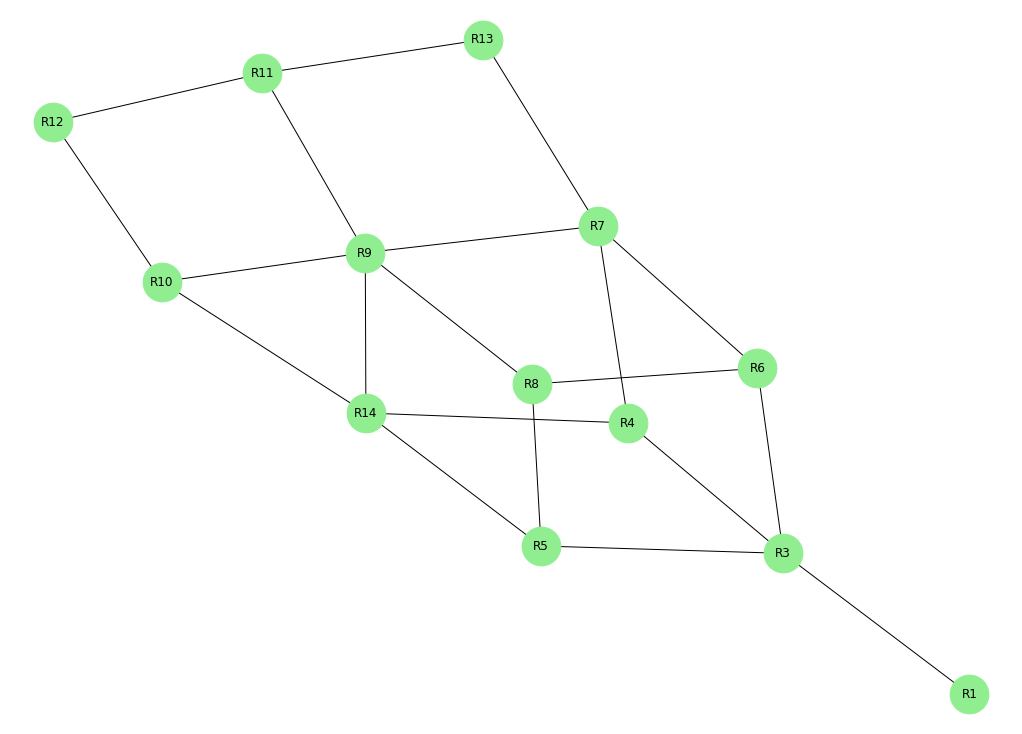

In [22]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from pylab import rcParams
import pandas as pd

tree_str = "a(1;0)|b(2,4,6;1)|c(3;2)|d(5;4)|e(7;6)"

# paths = df.loc[:,'BUILDING':].stack().groupby(level=0).agg(list).values.tolist()
nodes = {'R1': set(), 'R14': {'R14', 'R5', 'R4'}, 'R3': {'R1'}, 'R4': {'R3'}, 'R5': {'R3'}, 'R6': {'R3'}, 'R7': {'R6', 'R4'}, 'R8': {'R5', 'R6'}, 'R9': {'R14', 'R7', 'R8'}, 'R10': {'R14', 'R9'}, 'R11': {'R9', 'R13'}, 'R12': {'R11', 'R10'}, 'R13': {'R7'}}
G = nx.Graph()
for s, t in nodes.items():
    if t:
        for t_n in t:
            G.add_edge(s, t_n)
    else:
        G.add_node(s)
rcParams["figure.figsize"] = 14, 10
# pos = graphviz_layout(G, prog="neato")
# pos = nx.circular_layout(G)
pos = nx.spring_layout(G, k=0.1, iterations=1000)


# for p in pos:

#     yOffSet = -300
#     xOffSet = -400

#     pos[p] = (pos[p][0]+xOffSet,pos[p][1]+yOffSet)


nx.draw(
    G, pos=pos, node_color="lightgreen", node_size=1500, with_labels=True, arrows=False, 
)

print(pos)


In [3]:
tree_str = "a(1;0)|b(2,4,6;1)|c(3;2)|d(5;4)|e(7;6)"


https://stackoverflow.com/questions/49368341/position-showing-of-labels-with-networkx-graphviz


https://stackoverflow.com/questions/20213956/plot-a-tree-like-graph-with-root-node-at-the-top


https://plotly.com/python/tree-plots/

dist_between nodes: 72

[[1.0382609841335093, 1.5397437802302227], [0.6083207577589101, 1.0363550303990763], [0.7135515773987405, 0.2922263572830628], [0.06959961342603835, 0.6950910591121429], [-0.11297940586580386, 1.044672227587274], [0.012661180843946355, 0.20920034147049824], [-0.6708582069800718, 0.705414898813674], [-0.6124332040471017, -0.02527813650807394], [-1.0746477836939257, -0.4720973601022648], [-0.6168580163250889, -0.8141299855962832], [-1.2189350908539764, -1.1135774605271147], [0.1401734634021433, -0.6623141309435644], [0.15006785834461903, -0.09400537002363257], [-0.25917032462948686, -0.7040524052056962]]


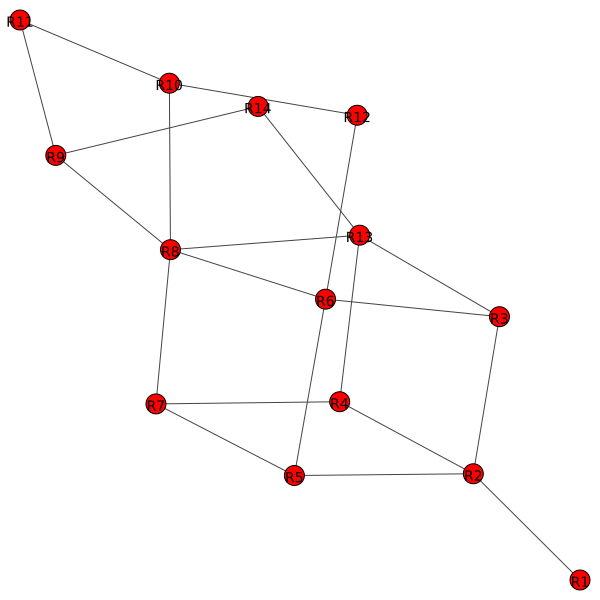

In [16]:
import igraph as ig

# import cairo
# import cairocffi

nodes = {'R1': set(), 'R2': {'R1'}, 'R3': {'R2'}, 'R4': {'R2'}, 'R5': {'R2'}, 'R6': {'R5', 'R3'}, 'R7': {'R4', 'R5'}, 'R8': {'R13', 'R6', 'R7'}, 'R9': {'R8', 'R14'}, 'R10': {'R8', 'R12'}, 'R11': {'R9', 'R10'}, 'R12': {'R6'}, 'R13': {'R4', 'R3'}, 'R14': {'R13'}}
g = ig.Graph()
for s, t in nodes.items():
    g.add_vertex(s, label=s)
for s, t in nodes.items():
    for t_n in t:
        g.add_edge(s, t_n)

layout = g.layout(layout='auto')
# layout = g.layout_reingold_tilford(mode="in", root=[0])
print(layout.coords)
# layout = layout.scale(1)
ig.plot(g, layout=layout)
